# **Decision Tree y Random Forest**

## **Librerías**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = False

In [54]:
import category_encoders as ce

In [46]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## **1. Datos**

In [30]:
df = pd.read_csv('./Datos/car_evaluation.csv', header=None)

In [31]:
df.columns=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [32]:
df.sample()

,buying,maint,doors,persons,lug_boot,safety,class
1505,low,high,5more,more,small,high,acc


In [33]:
# Miramos el formato de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [34]:
#Buscamos valores nulos
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [35]:
# Exploramos nuestra variable objetivo
df.value_counts('class')

class
unacc    1210
acc       384
good       69
vgood      65
dtype: int64

## **2. EDA**

### **Preparación de los datos**

In [38]:
X = df.drop('class', axis=1)
y = df[['class']]

In [62]:
# Ajustamos el formato de nuestros datos
encoder = ce.OrdinalEncoder(cols=X.columns)

In [67]:
# Aplicamos el encoder
X = encoder.fit_transform(X)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=13)

## **3. Modelaje**

### **Inicialización del modelo**

In [71]:
dec_tree = DecisionTreeClassifier(
    max_depth=3,
    random_state=13
)

In [72]:
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=13)

#### **Entrenamiento**

In [73]:
y_pred_train = dec_tree.predict(X_train)

In [76]:
accuracy_score(y_train, y_pred_train)

0.7923904052936311

In [79]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

         acc       0.53      0.55      0.54       269
        good       0.00      0.00      0.00        49
       unacc       0.87      0.96      0.91       846
       vgood       0.00      0.00      0.00        45

    accuracy                           0.79      1209
   macro avg       0.35      0.38      0.36      1209
weighted avg       0.73      0.79      0.76      1209



C:\Users\jmart\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jmart\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jmart\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


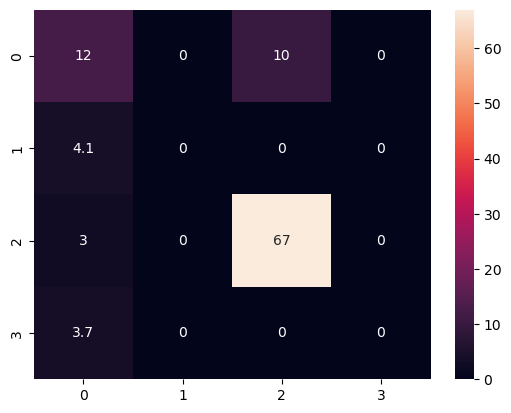

In [84]:
sns.heatmap(confusion_matrix(y_train, y_pred_train)/len(y_train)*100, annot=True)

plt.show()

#### **Testeo**

In [77]:
y_pred_test = dec_tree.predict(X_test)

In [78]:
accuracy_score(y_test, y_pred_test)

0.789980732177264

In [80]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         acc       0.53      0.49      0.51       115
        good       0.00      0.00      0.00        20
       unacc       0.86      0.97      0.91       364
       vgood       0.00      0.00      0.00        20

    accuracy                           0.79       519
   macro avg       0.35      0.36      0.35       519
weighted avg       0.72      0.79      0.75       519



C:\Users\jmart\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jmart\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jmart\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


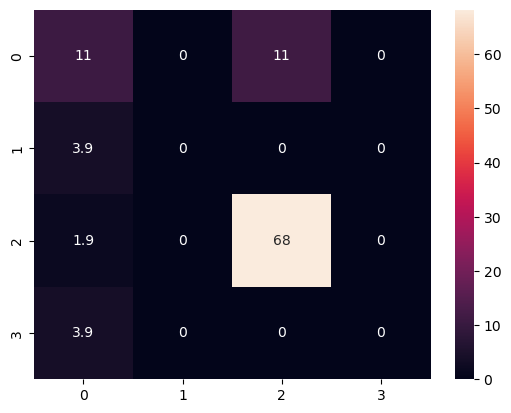

In [85]:
sns.heatmap(confusion_matrix(y_test, y_pred_test)/len(y_test)*100, annot=True)

plt.show()